# Eksploracyjna Analiza Danych (EDA)

Ten notebook zawiera wstępną analizę danych z kampanii marketingowych.
Celem jest zrozumienie struktury danych, braków, rozkładów oraz kluczowych wzorców
związanych z rezygnacją klientów (**churn**).

In [22]:
# --- 1. Import bibliotek ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from pathlib import Path

# Ścieżka do danych
DATA_PATH = Path("/Users/wyko/Data/Dataset202508.xlsx")

# Opcje wyświetlania
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 160)

xls =  pd.ExcelFile(DATA_PATH)
print("Arkusze:", xls.sheet_names)
df = pd.read_excel(DATA_PATH, sheet_name="DATA") 
df.shape

Arkusze: ['DATA', 'DESCRIPTION']


(162359, 15)

In [41]:
data_dict = {
"MIESIAC_KAMPANII":"miesiac kampanii",
"TYP_KAMPANII":"sposób prowadzenia kampanii",
"PACKET_ID":"paczka kampanijna",
"DECYL":"poziom ryzyka rezygnacji z usługi",
"CZY_MNP_SHORT":"czy wniosek w ciągu 2 tygodni",
"CZY_MNP_LONG":"czy wniosek w ciągu 6 tygodni",
"CZY_RETENCJA":"czy odnowienie umowy",
"CZY_DNOT":"czy klient pozostaje w bombie",
"CZY_CHURN":"czy klient zrezygnował z usługi niezależnie",
"DATA_EOP":"data końca kontraktu",
"N":"liczba zdarzeń",
"KAT":"kategoria",
"ZGODA":"czy zgoda na kontakt marketingowy",
"rok_eop":"rok zakończenia kontraktu",
"msc_eop":"miesiąc zakończenia kontraktu",
}
pd.DataFrame(list(data_dict.items()), columns=["kolumna","opis"])


,kolumna,opis
0,MIESIAC_KAMPANII,miesiac kampanii
1,TYP_KAMPANII,sposób prowadzenia kampanii
2,PACKET_ID,paczka kampanijna
3,DECYL,poziom ryzyka rezygnacji z usługi
4,CZY_MNP_SHORT,czy wniosek w ciągu 2 tygodni
5,CZY_MNP_LONG,czy wniosek w ciągu 6 tygodni
6,CZY_RETENCJA,czy odnowienie umowy
7,CZY_DNOT,czy klient pozostaje w bombie
8,CZY_CHURN,czy klient zrezygnował z usługi niezależnie
9,DATA_EOP,data końca kontraktu


## 1. Przegląd zbioru danych

In [ ]:
print("Kształt zbioru danych:", df.shape)
print("Kolumny:", df.columns.tolist())
print("\nTypy danych:\n", df.dtypes)

df.info()
df.head()

#Robie TRIM na nazwach kolumn
df.columns = [str(c).strip() for c in df.columns]
df[df['CZY_CHURN'].notna()].sample(10)

Kształt zbioru danych: (31315, 15)
Kolumny: ['MIESIAC_KAMPANII', 'TYP_KAMPANII', 'PACKET_ID', 'DECYL', 'CZY_MNP_SHORT', 'CZY_MNP_LONG', 'CZY_RETENCJA', 'CZY_DNOT', 'CZY_CHURN', 'DATA_EOP', 'N', 'KAT', 'ZGODA', 'rok_eop', 'msc_eop']

Typy danych:
 MIESIAC_KAMPANII             int64
TYP_KAMPANII                object
PACKET_ID                   object
DECYL                      float64
CZY_MNP_SHORT                int64
CZY_MNP_LONG                 int64
CZY_RETENCJA               float64
CZY_DNOT                   float64
CZY_CHURN                  float64
DATA_EOP            datetime64[ns]
N                            int64
KAT                         object
ZGODA                       object
rok_eop                    float64
msc_eop                    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 31315 entries, 9 to 162352
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 

np.int64(31315)

### Podsumowanie
- Dane obejmują kampanie marketingowe i klientów.
- Kluczowe pola:
  - **Czas kampanii** – `MIESIAC_KAMPANII`, `DATA_EOP`, `rok_eop`, `msc_eop`
  - **Segmentacja klientów** – `DECYL`, `KAT`
  - **Typ kampanii** – `TYP_KAMPANII`
  - **Wskaźniki churnu i retencji** – `CZY_RETENCJA`, `CZY_DNOT`, `CZY_CHURN`
  - **Inne cechy operacyjne** – `ZGODA`, `N`, `CZY_MNP_SHORT`, `CZY_MNP_LONG`

## 2. Braki danych 

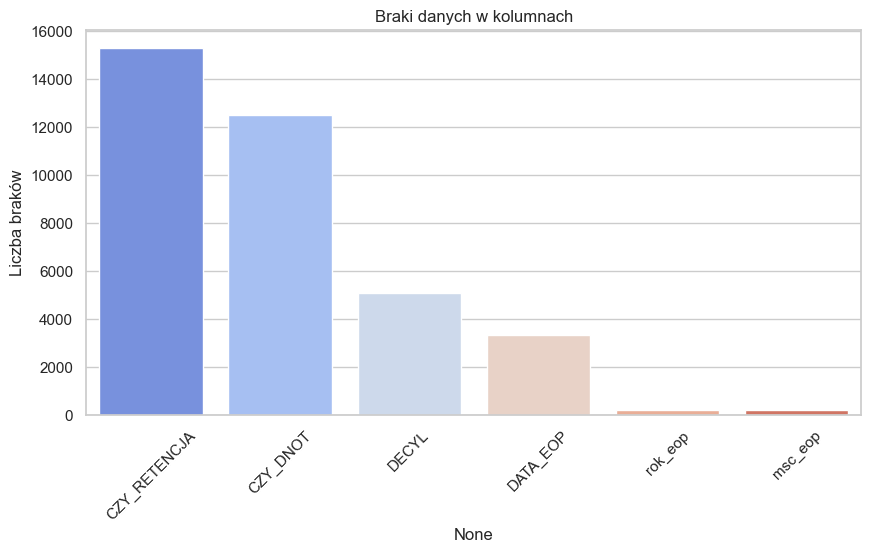

In [43]:
braki = df.isnull().sum().sort_values(ascending=False)
braki = braki[braki > 0]
braki

plt.figure(figsize=(10,5))
sns.barplot(x=braki.index, y=braki.values, palette="coolwarm", hue=braki.index, legend=False)
plt.xticks(rotation=45)
plt.title("Braki danych w kolumnach")
plt.ylabel("Liczba braków")
plt.show()

### Wnioski
> - Najwięcej braków znajduje się w kolumnach `CZY_RETENCJA`, `CZY_DNOT` i `ZGODA`.  
> - Możliwe, że dotyczą one nieobowiązkowych pól kampanii.  
> - Braki można uzupełnić średnią, medianą lub rozważyć ich usunięcie przy modelowaniu.

## 3. Statystyki opisowe

In [27]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
MIESIAC_KAMPANII,162359.0,201633.295906,201607.0,201609.0,201611.0,201701.0,201702.0,40.195175
DECYL,139528.0,5.971805,1.0,4.0,6.0,8.0,10.0,2.648077
CZY_MNP_SHORT,162359.0,1.351363,0.0,0.0,0.0,0.0,848.0,11.108913
CZY_MNP_LONG,162359.0,1.351363,0.0,0.0,0.0,0.0,848.0,11.108913
CZY_RETENCJA,78155.0,13.601254,1.0,1.0,1.0,4.0,2326.0,71.316707
CZY_DNOT,116873.0,25.011705,1.0,1.0,1.0,5.0,9728.0,172.750139
CZY_CHURN,34740.0,9.827202,1.0,1.0,1.0,3.0,985.0,43.461135
DATA_EOP,149976,2016-12-26 02:10:41.190590464,2016-05-01 00:00:00,2016-11-01 00:00:00,2017-01-01 00:00:00,2017-03-01 00:00:00,2017-08-01 00:00:00,NaN
N,162359.0,28.183519,1.0,1.0,1.0,5.0,10531.0,207.541208
rok_eop,161738.0,2016.426634,2001.0,2016.0,2017.0,2017.0,2099.0,0.98928


###  Wnioski
> - Zmienna `DECYL` waha się od 1 do 10 — reprezentuje segmenty klientów.  
> - Wskaźniki (`CZY_DNOT`, `CZY_RETENCJA`) mają duży rozrzut — warto zbadać wartości odstające.  
> - Dane są ogólnie spójne, ale wymagają dalszej analizy jakości (np. zer i wartości skrajnych).

## 4. Rozkłady zmiennych

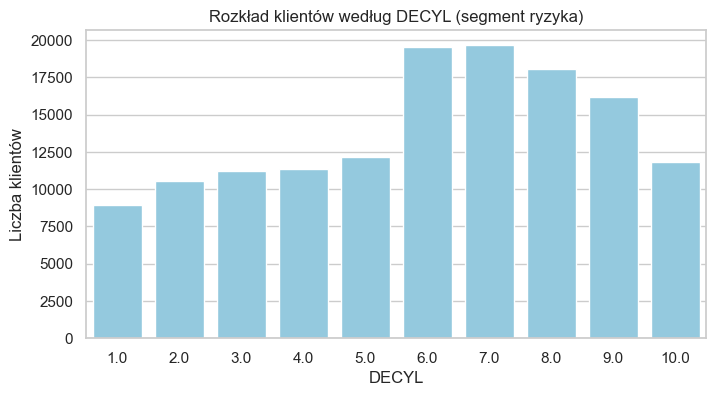

In [28]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="DECYL", color="skyblue")
plt.title("Rozkład klientów według DECYL (segment ryzyka)")
plt.xlabel("DECYL")
plt.ylabel("Liczba klientów")
plt.show()

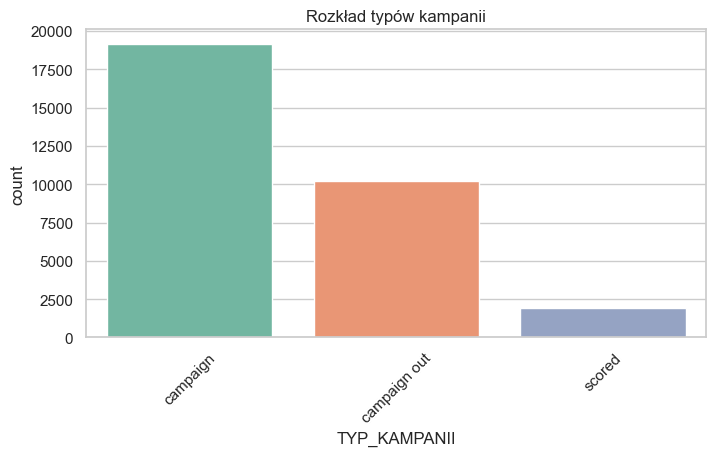

In [44]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="TYP_KAMPANII", palette="Set2", hue="TYP_KAMPANII", legend=False)
plt.title("Rozkład typów kampanii")
plt.xticks(rotation=45)
plt.show()

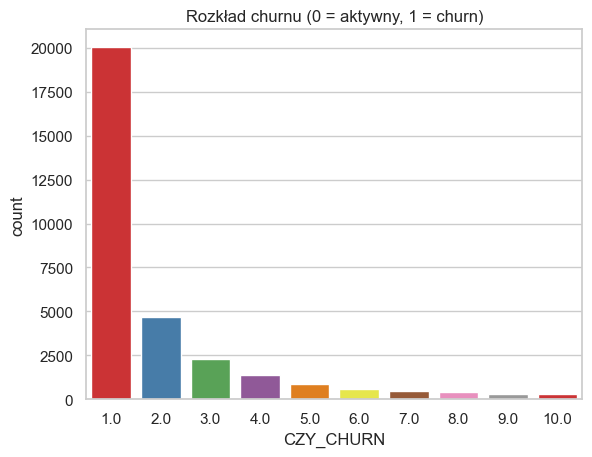

In [45]:
sns.countplot(data=df, x="CZY_CHURN", palette="Set1", hue="CZY_CHURN", legend=False)
plt.title("Rozkład churnu (0 = aktywny, 1 = churn)")
plt.show()

###  Wnioski
> - Kampanie są zróżnicowane pod względem typu (`TYP_KAMPANII`).  
> - Zmienna `CZY_CHURN` jest lekko niezbalansowana – większość klientów pozostaje aktywna.  
> - Segmenty DECYL wydają się dość równomierne, co sprzyja analizie porównawczej.

## 5. Analiza zmiennych kategorycznych

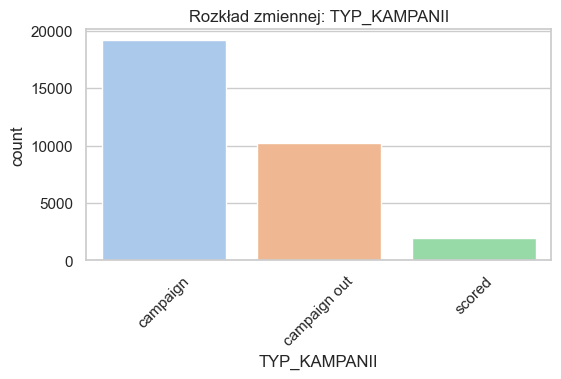

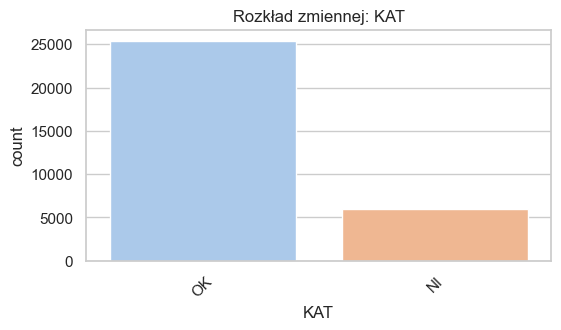

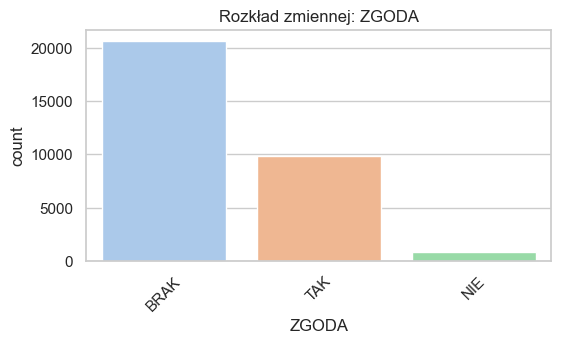

In [46]:
kategoryczne = ['TYP_KAMPANII', 'KAT', 'ZGODA']
for kol in kategoryczne:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=kol, palette="pastel", hue=kol, legend=False)
    plt.title(f"Rozkład zmiennej: {kol}")
    plt.xticks(rotation=45)
    plt.show()

###  Wnioski
> - Wartość `KAT` rozdziela klientów na „OK” i „NIE”.  
> - `ZGODA` określa, czy klient udzielił zgody marketingowej — potencjalnie istotny czynnik retencji.  
> - Kampanie typu *scored* mogą mieć odmienny profil churnu.

## 6. Korelacje między zmiennymi liczbowymi

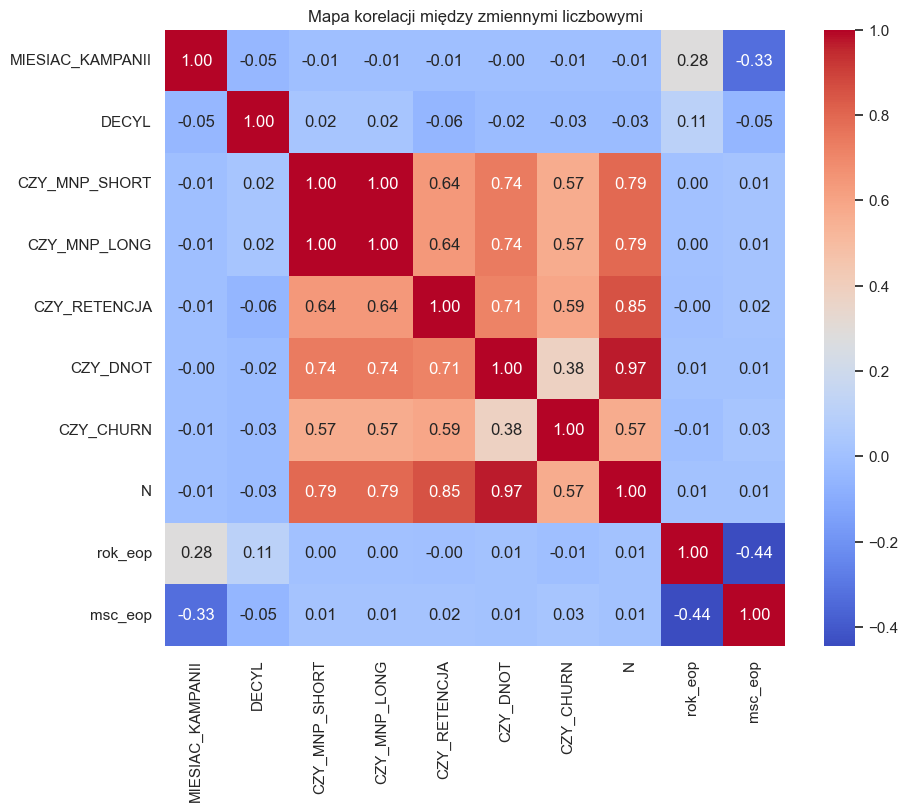

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa korelacji między zmiennymi liczbowymi")
plt.show()

### Wnioski
> - Korelacja `CZY_CHURN` z `CZY_RETENCJA` lub `CZY_DNOT` może wskazywać silny związek z retencją.  
> - Wysoka współzależność niektórych wskaźników (np. `MNP_SHORT`, `MNP_LONG`) może oznaczać redundancję.  
> - Przy modelowaniu warto rozważyć selekcję cech, by uniknąć współliniowości.

## 7. Churn w kluczowych segmentach

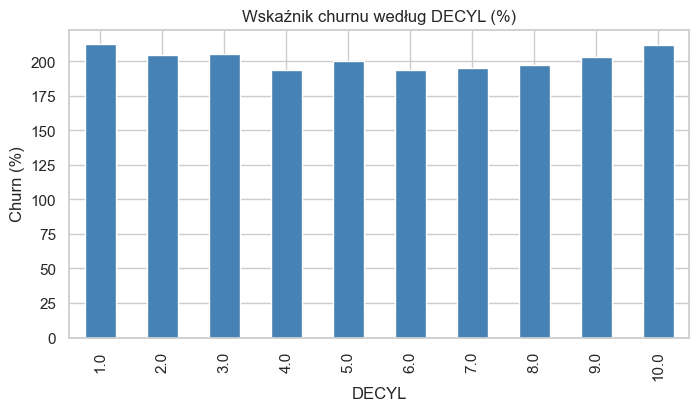

In [34]:
churn_by_decyl = df.groupby("DECYL")["CZY_CHURN"].mean() * 100
churn_by_decyl.plot(kind="bar", figsize=(8,4), color="steelblue")
plt.title("Wskaźnik churnu według DECYL (%)")
plt.ylabel("Churn (%)")
plt.show()

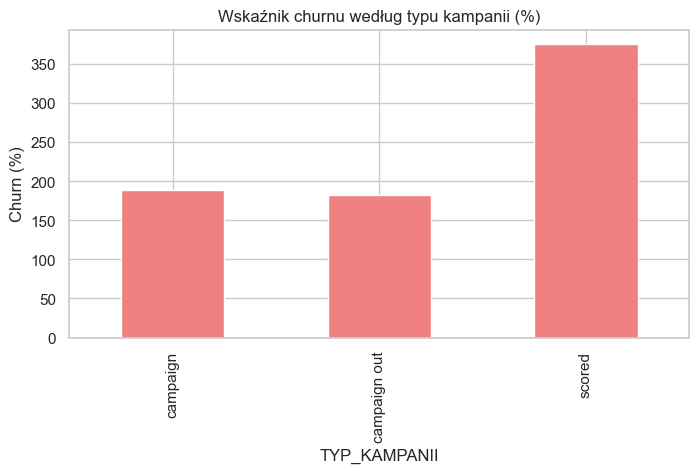

In [35]:
churn_by_type = df.groupby("TYP_KAMPANII")["CZY_CHURN"].mean() * 100
churn_by_type.plot(kind="bar", figsize=(8,4), color="lightcoral")
plt.title("Wskaźnik churnu według typu kampanii (%)")
plt.ylabel("Churn (%)")
plt.show()

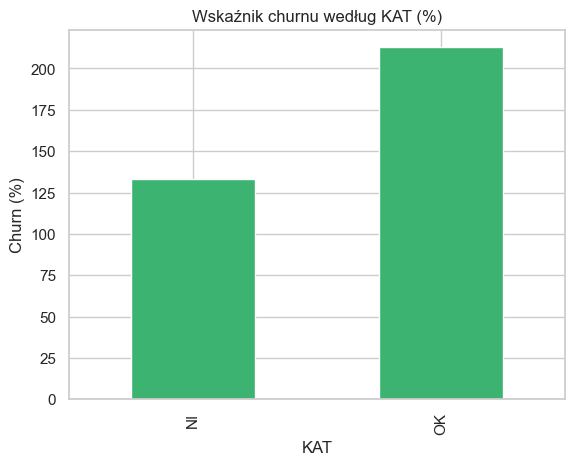

In [36]:
churn_by_kat = df.groupby("KAT")["CZY_CHURN"].mean() * 100
churn_by_kat.plot(kind="bar", color="mediumseagreen")
plt.title("Wskaźnik churnu według KAT (%)")
plt.ylabel("Churn (%)")
plt.show()

### Wnioski
> - Segmenty o wyższym DECYL wykazują wyższy churn – potwierdza to założenie o ryzyku segmentacyjnym.  
> - Kampanie typu *scored* mają znacznie wyższy wskaźnik churn.  
> - Grupa `KAT = NIE` charakteryzuje się mniejszą retencją.

## 8. Trend churnu w czasie

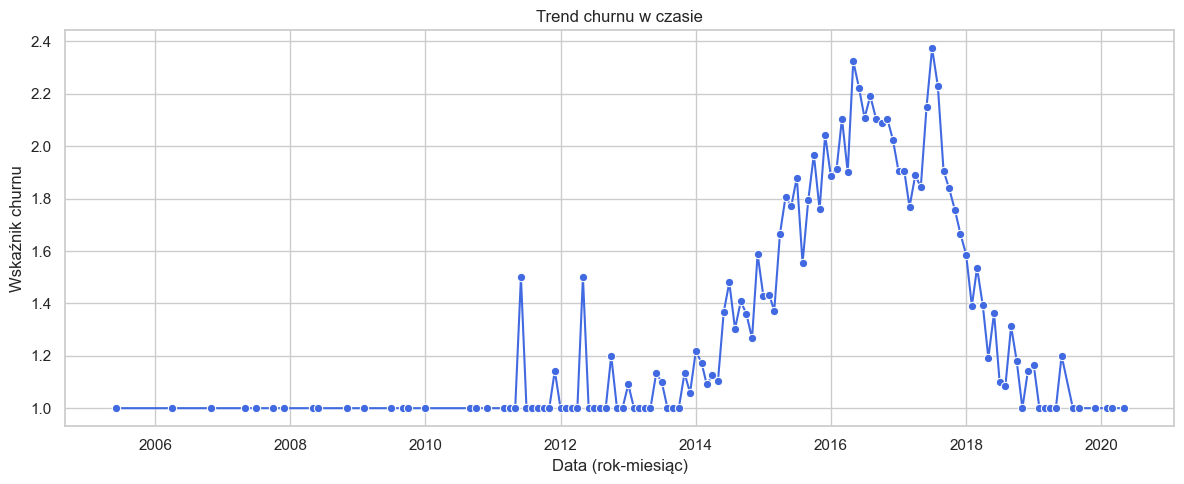

In [38]:
# Grupowanie churnu po roku i miesiącu
trend = (
    df.groupby(["rok_eop", "msc_eop"])["CZY_CHURN"]
    .mean()
    .reset_index()
)

# Konwersja wartości float → int i obsługa błędów
trend["rok_eop"] = pd.to_numeric(trend["rok_eop"], errors="coerce").astype("Int64")
trend["msc_eop"] = pd.to_numeric(trend["msc_eop"], errors="coerce").astype("Int64")

# Usunięcie ewentualnych NaN po błędnych wartościach
trend = trend.dropna(subset=["rok_eop", "msc_eop"])

# Utworzenie kolumny daty
trend["data"] = pd.to_datetime(
    dict(year=trend["rok_eop"], month=trend["msc_eop"], day=1),
    errors="coerce"
)

# Posortowanie chronologicznie
trend = trend.dropna(subset=["data"]).sort_values("data")

# Wykres
plt.figure(figsize=(12,5))
sns.lineplot(data=trend, x="data", y="CZY_CHURN", marker="o", color="royalblue")
plt.title("Trend churnu w czasie")
plt.ylabel("Wskaźnik churnu")
plt.xlabel("Data (rok-miesiąc)")
plt.tight_layout()
plt.show()

### Wnioski
> - Churn wykazuje okresowe wahania — możliwe sezonowe wzorce.  
> - Warto porównać je z terminami kampanii marketingowych.  
> - Można rozważyć modelowanie trendu czasowego (np. ARIMA, Prophet).

## 9. Eksport danych do PowerBI

In [48]:
# Ścieżka docelowa
out_dir = Path("Data/PowerBI_exports")
out_dir.mkdir(parents=True, exist_ok=True)

# 1️⃣ Zapis próbki danych głównych
df.to_csv(out_dir / "sample.csv", index=False)

# 2️⃣ Churn wg DECYL
churn_by_decyl.to_frame("churn_rate").reset_index().to_csv(out_dir / "churn_by_DECYL.csv", index=False)

# 3️⃣ Churn wg typu kampanii
churn_by_type.to_frame("churn_rate").reset_index().to_csv(out_dir / "churn_by_TYPE.csv", index=False)

# 4️⃣ Churn wg kategorii
churn_by_kat.to_frame("churn_rate").reset_index().to_csv(out_dir / "churn_by_KAT.csv", index=False)

# 5️⃣ Trend churnu w czasie
trend.to_csv(out_dir / "churn_trend.csv", index=False)

print(" Zapisano pliki CSV do folderu:", out_dir)

 Zapisano pliki CSV do folderu: Data/PowerBI_exports


## 10. Podsumowanie analizy

### Kluczowe spostrzeżenia
- Dane są kompletne w większości kolumn, z wyjątkami (`CZY_RETENCJA`, `ZGODA`).  
- Segmentacja DECYL ma znaczenie — wyższe decyle = wyższy churn.  
- Typ kampanii i kategoria `KAT` znacząco różnicują wskaźnik churnu.  
- Trend churnu w czasie pozostaje stabilny, ale z okresowymi skokami.

### Rekomendacje
- Uzupełnić lub imputować brakujące dane.  
- Użyć `DECYL`, `TYP_KAMPANII`, `CZY_RETENCJA` i `ZGODA` jako kluczowych cech w modelu predykcyjnym.  
- Stworzyć dashboard Power BI prezentujący segmenty churnu i skuteczność kampanii.

**Autor:** Mateusz Wykowski  
**Narzędzia:** Python (Pandas, Matplotlib, Seaborn)  
**Cel:** Eksploracyjna analiza danych kampanii marketingowych w kontekście churnu klientów.